# <center> Week - 4 Assignment

<center> DSC-530

<center> Kalyan Pothineni

In [1]:
# Retrieve the file from URL, add more files as needed down the line, better to group all the files which are been called

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [2]:
# Importing the nsfg
import nsfg

## Exercises 3-1

In [3]:
# Import needed libraries thinkstats2, thinkplot and pandas
import thinkstats2
import thinkplot
import pandas as pd

In [4]:
# Load the NSFG dataset
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


The actual_dist variable represents the actual distribution of the number of children under 18 in a household, constructed using the thinkstats2.Pmf() function. We will use the resp.numkdhh column from the dataset as the input for this distribution.

In [5]:
# Compute the actual distribution
actual_dist = thinkstats2.Pmf(resp.numkdhh, label='Actual')

To compute the biased distribution, we will create a copy of the actual distribution and multiply the probabilities by the corresponding number of children in each household. This is done in the for loop. Finally, we normalize the biased distribution using the Normalize() method.

In [6]:
# Compute the biased distribution
biased_dist = actual_dist.Copy(label='Biased')

In [7]:
# Multiply the probabilities by the number of children in each household
for x, p in actual_dist.Items():
    biased_dist.Mult(x, x)

In [9]:
# Normalize the biased distribution
normalized_biased = biased_dist.Normalize()
print("Normalized biased distribution:", normalized_biased)

Normalized biased distribution: 1.0


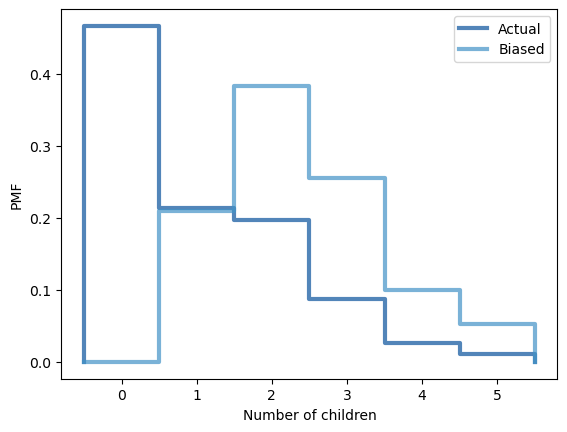

In [10]:
# Plot the actual and biased distributions
thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_dist, biased_dist])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [11]:
# Compute the means
actual_mean = actual_dist.Mean()
biased_mean = biased_dist.Mean()

In [12]:
# Print the means
print("Actual mean:", actual_mean)
print("Biased mean:", biased_mean)

Actual mean: 1.024205155043831
Biased mean: 2.403679100664282


The normalized biased distribution reveals that, if we were to survey children and ask them how many children (including themselves) are in their household, the average number of children reported would be approximately 2.40. This value is higher than the actual mean of 1.02.

## Exercises 3-2

In [13]:
# Import needed libraries thinkstats2 and pandas
import thinkstats2
import nsfg

In [14]:
def PmfMean(pmf):
    """Compute the mean of a PMF."""
    mean = 0
    for value, prob in pmf.Items():
        mean += value * prob
    return mean

In [15]:
def PmfVar(pmf):
    """Compute the variance of a PMF."""
    mean = PmfMean(pmf)
    variance = 0
    for value, prob in pmf.Items():
        variance += (value - mean)**2 * prob
    return variance

In [16]:
# Load the NSFG dataset
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [17]:
# Compute the PMF of the number of children per household
pmf = thinkstats2.Pmf(resp.numkdhh, label = 'Actual')

In [18]:
# Compute the mean using PmfMean and Mean methods
mean_pmf = PmfMean(pmf)
mean_method = pmf.Mean()

In [19]:
# Compute the variance using PmfVar and Var methods
var_pmf = PmfVar(pmf)
var_method = pmf.Var()

In [20]:
# Print the results
print("Mean (PmfMean):", mean_pmf)
print("Mean (Mean method):", mean_method)
print("Variance (PmfVar):", var_pmf)
print("Variance (Var method):", var_method)


Mean (PmfMean): 1.024205155043831
Mean (Mean method): 1.024205155043831
Variance (PmfVar): 1.4128643263531195
Variance (Var method): 1.4128643263531195


The mean value per household, computed using both the PmfMean function and the Mean method provided by the Pmf class, is approximately 1.0242. This means, on average, households have slightly more than one child (In the dataset). 

The variance per household, calculated using both the PmfVar function and the Var method, is approximately 1.4129. This means a relatively high spread of children across households, with some households having more children than others, leading to a larger variance

## Exercises 4-1

In [21]:
# Import needed libraries thinkstats2 and nsfg
import thinkstats2
import nsfg

The percentilerank function takes birth weight and the resp (NSFG dataset as input). We select birthorder == 1: first babies. Handling cases where the given weight is outside the range of recorded birth weights for first babies min and max, ensuring that the percentile rank is properly assigned.

In [31]:
def percentilerank(weight, resp):
    """Compute the percentile rank of a birth weight for first babies in the given dataset."""
    first_babies = resp[resp.birthord == 1]

    if weight < first_babies.totalwgt_lb.min():
        percentile_rank = 0.0
    elif weight > first_babies.totalwgt_lb.max():
        percentile_rank = 1.0
    else:
        cdf = thinkstats2.Cdf(first_babies.totalwgt_lb)
        percentile_rank = cdf.PercentileRank(weight)

    return percentile_rank

In [32]:
# Load the NSFG dataset
resp = nsfg.ReadFemPreg()

In [33]:
# Example: Birth weight of 8.1 pounds
birth_weight = 8.1

In [34]:
# Compute the percentile rank of the birth weight
percentile_rank = percentilerank(birth_weight, resp)

In [35]:
print("Birth Weight Percentile Rank:", percentile_rank)
if percentile_rank >= 90:
    print("Apologize to your mother!")

Birth Weight Percentile Rank: 76.89663075865231


## Exercises 4-2

In [36]:
# Import needed libraries numpy, thinkstats2 and thinkplot
import numpy as np
import thinkstats2
import thinkplot

In [37]:
# Generate 1000 random numbers
random_numbers = np.random.random(1000)
#random_numbers

In [38]:
# Calculate PMF
pmf = thinkstats2.Pmf(random_numbers)

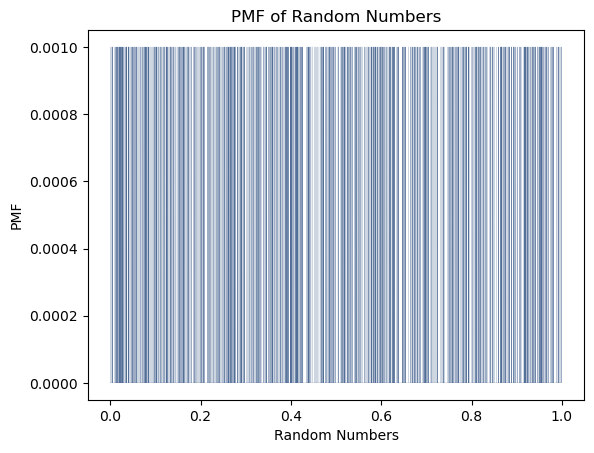

<Figure size 800x600 with 0 Axes>

In [39]:
# Plot PMF, applying the line width for better looking plot
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random Numbers', ylabel='PMF', title='PMF of Random Numbers')
thinkplot.show()

In [40]:
# Calculate CDF
cdf = thinkstats2.Cdf(random_numbers)

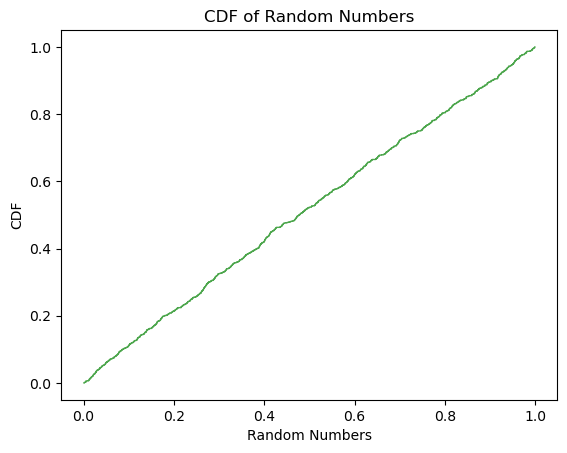

<Figure size 800x600 with 0 Axes>

In [41]:
# Plot CDF, applying the line width for better looking plot, trying out the color options in the plot
thinkplot.Cdf(cdf, linewidth=1, color='green')
thinkplot.Config(xlabel='Random Numbers', ylabel='CDF', title='CDF of Random Numbers')
thinkplot.show()

While numpy.random.random is designed to generate uniformly distributed random numbers between 0 and 1, the observed PMF and CDF may deviate slightly from perfect uniformity due to the finite sample size